## Homework 2, Intro to NLP, 2017

#### This is due at 11pm on Tuesday, October 10. Please see detailed submission instructions below.  100 points total.

##### How to do this problem set:

- What version of Python should I use? 2.7

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out supporting files, `vit_starter.py`,`classperc.py` and `structperc.py`.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `vit_starter.py`, `classperc.py`, `structperc.py` and `hw_2.ipynb` on Moodle.
  
- **Important:** Check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipython notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. You are responsible for checking for these errors. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf hw_1.ipynb` to identify and fix any syntax errors that might be causing problems.

- **Important:** When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One convenient way to do this is by clicking `Cell -> Run All` in the notebook menu.
 

##### Academic honesty 

- We will audit the Moodle code from a few dozen students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your Gradescope PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a potential case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is considered a serious case of cheating.

## 1. HMM (15 points)

Answer the following questions using the transition matrix
$T$ and emission probabilities $E$ below. Below, $\Delta$ and $\Box$
are two output variables, $A$ and $B$ are two hidden states; $s_n$ refers to
the $n^{th}$ hidden state in the sequence and $o_n$ refers to the
$n^{th}$ observation.

<img src="2.png"> 

For all the questions in this section, write answer and show your work.

**Question 1.1 (2 points)**

Does $P(o_2=\Delta|s_1=B) = P(o_2=\Delta|o_1=\Box)$?

No. They are not equal. $P(o_2=\Delta|s_1=B)$ = 0.32 and $P(o_2=\Delta|o_1=\Box)$ = 0.224

<img src='1.1.jpg'>

**Question 1.2 (2 points)**

Does $P(s_2=B|s_1=A) = P(s_2=B|s_1=A, o_1 = \Delta)$?

$P(s_2=B|s_1=A) = 0.4$ and $P(s_2=B|s_1=A, o_1 = \Delta) = 0.4$ 

**They are equal**
<img src='1.2.jpg'>

**Question 1.3 (3 points)**

Does $P(o_2=\Delta|s_1=A) = P(o_2=\Box|s_1=A, s_3=A)$

$P(o_2=\Delta|s_1=A) = 0.19$ and $P(o_2=\Box|s_1=A, s_3=A) = 0.65$

**They are not equal.**
<img src='1.3.jpg'>

**Question 1.4 (3 points)**

Compute the probability of observing $\Box$ as the first emission of a sequence generated by an HMM with transition
matrix $T$ and emission probabilities $E$.

**$P(o_2=\Delta) = 0.6$**

<img src='1.4.jpg'>



**Question 1.5 (5 points)**

Compute the probability of the first state being $A$ given that the last token in an observed sequence of length 2
was the token $\Delta$.

** Answer = 0.3725 **
<img src='1.5.jpg'>
<img src='1.5.2.jpg'>

## 2. Viterbi (log-additive form) (20 points)

<img src="1.png"> 



One HMM chain is shown on the left.  The corresponding **factor graph** version is shown on the right.
This simply shows the structure of the $A$ and $B_t$ log-prob tables and which variables they express
preferences over. $A$ is the **transition factor** that has preferences for the two neighboring
variables; for example, $A(y_1,y_2)$ shows how happy the model is with the transition from $y_1$ to $y_2$.
The same transition preference function is used at all positions $(t-1,t)$ for each $t=2..T$.
$B_t$ is the **emission factor** that has preferences for the variable $y_t$.
As a goodness function it is e.g. $B_1(y_1)$, $B_2(y_2)$, etc.

Let $\vec{y} = (y_1,y_2,...,y_T)$, a proposed tag sequence for a $T$ length sentence.
The total goodness function for a solution $\vec{y}$ is

$$ G(\vec{y}) = \sum_{t=1}^{T} B_t(y_t)  + \sum_{t=2}^{T} A(y_{t-1},y_t) $$


**Question 2.1 (2 points)**

Define $A$ and $B_t$ in terms of the HMM model, such that $G$ is the same thing as $\log p(\vec{y},\vec{w})$ under the HMM.

**Write the mathematical expressions here.**
<img src='2.1.jpg'>


**Question 2.2 (18 points)**

Implement additive log-space Viterbi by completing the **viterbi()** function. It takes in tables that represent the $A$ and $B$ functions as input.  We give you an implementation of $G()$ in **vit_starter**, you can check to make sure you understand the data structures, and also the exhaustive decoding algorithm too.  Feel free to add debugging print statements as needed.  The main code runs the exercise example by default.

When debugging, you should make new A and B examples that are very simple. This will test different code paths.  Also you can try the **randomized\_test()** from the starter code.

Look out for negative indexes as a bug.  In python, if you use an index that's too high to be in the list, it throws an error.  But it will silently accept a negative index ... it interprets that as indexing from the right.


In [97]:
# Implement the viterbi() function in vit_starter.py and then run this cell to show your output

from vit_starter import *

if __name__=='__main__':
    A = {(0,0):3, (0,1):0, (1,0):0, (1,1):3}
    Bs= [ [0,1], [0,1], [30,0] ]
    # that's equivalent to: [ {0:0,1:1}, {0:0,1:1}, {0:30,1:0} ]

    y = exhaustive(A, Bs, set([0,1]))
    print "Exhaustive decoding:", y
    print "score:", goodness_score(y, A, Bs)
    y = viterbi(A, Bs, set([0,1]))
    print "Viterbi    decoding:", y
    randomized_test()


Exhaustive decoding: [0, 0, 0]
score: 36
Viterbi    decoding: [0, 0, 0]
output_vocab= [0, 1, 2, 3, 4]
A= {(1, 3): 0.5394686537201928, (3, 0): 0.29852356392742285, (2, 1): 0.7270418862610142, (0, 3): 0.29743128264569274, (4, 0): 0.5759046378666393, (1, 2): 0.21523979811244875, (3, 3): 0.12503556568945928, (4, 4): 0.34437293924735024, (2, 2): 0.15621110316037023, (4, 1): 0.7729065069154996, (1, 1): 0.5833500293130179, (3, 2): 0.579658363745601, (0, 0): 0.10685549522956517, (0, 4): 0.11062241820258989, (1, 4): 0.6582399665516302, (2, 3): 0.3734950250974879, (4, 2): 0.6905665940569545, (1, 0): 0.2268813598629228, (0, 1): 0.36097262268524666, (3, 1): 0.8473721651707145, (2, 4): 0.9132918351659781, (2, 0): 0.8964116045656154, (4, 3): 0.47355139081942166, (3, 4): 0.2945984078156133, (0, 2): 0.805737435247844}
Bs= [[0.2262839609402948, 0.49927635847907237, 0.18560632224713303, 0.13903699633166577, 0.9318238905324856], [0.46118612545520876, 0.170906970587534, 0.6600423397326775, 0.8520595062131

**Copy and paste the viterbi function that you implemented in `vit_starter.py`.**

In [106]:
def viterbi(A_factor, B_factors, output_vocab):
    """
    A_factor: a dict of key:value pairs of the form
        {(curtag,nexttag): score}
    with keys for all K^2 possible neighboring combinations,
    and scores are numbers.  We assume they should be used ADDITIVELY, i.e. in log space.
    higher scores mean MORE PREFERRED by the model.

    B_factors: a list where each entry is a dict {tag:score}, so like
    [ {Noun:-1.2, Adj:-3.4}, {Noun:-0.2, Adj:-7.1}, .... ]
    each entry in the list corresponds to each position in the input.

    output_vocab: a set of strings, which is the vocabulary of possible output
    symbols.

    RETURNS:
    the tag sequence yvec with the highest goodness score
    """

    N = len(B_factors)   # length of input sentence

    # viterbi log-prob tables
    V = [{tag:None for tag in output_vocab} for t in range(N)]
    # backpointer tables
    # back[0] could be left empty. it will never be used.
    back = [{tag:None for tag in output_vocab} for t in range(N)]

    # todo implement the main viterbi loop here
    # you may want to handle the t=0 case separately

    #################################################
    # Initialize V[0]
    V[0]={tag_name:B_factors[0][tag_name] for tag_name in output_vocab}

    # for every position in input sequence
    for t in range(1,N):
        # for each possible output symbols
        for symbol in output_vocab:
            #Maximum vit value
            vit_maximum=-1*float("inf")
            #For every sysmbol in output_vocab
            for previous_symbol in output_vocab:
                # Get current viterbi score
                current_vit_score= V[t-1][previous_symbol] + A_factor[previous_symbol,symbol] + B_factors[t][symbol]

                # Update max vit if current_vit_score is greater than max vit
                if current_vit_score > vit_maximum:
                    vit_maximum=current_vit_score
                    V[t][symbol] = current_vit_score
                    back[t][symbol]= previous_symbol

    #get best symbol
    best_symbol=dict_argmax(V[N-1])
    #get best sequence
    best_sequence=[best_symbol]
    
    for i in range(N-1,0,-1):
        best_symbol = back[i][best_symbol]
        best_sequence.append(best_symbol)
    
    best_sequence.reverse()
    return best_sequence
    #################################################

## 3. Averaged Perceptron (5 points)

We will be using the following definition of the perceptron, which is
the multiclass or structured version of the perceptron.
The training set is a bunch of input-output pairs $(x_i,y_i)$.
(For classification, $y_i$ is a label, but for tagging, $y_i$ is a sequence). The training algorithm is as follows:

For T iterations, iterate through each $(x_i,y_i)$ pair in the dataset, and for each,
   1. Predict $y^* := \arg\max_{y'} \theta^T f(x_i, y')$
   2. If $y_i \neq y^*$: then update $\theta := \theta^{(old)} + r g$


where $r$ is a fixed step size (e.g. $r=1$)
and $g$ is the *gradient vector*, meaning a vector that will get added
into $\theta$ for the update, specifically
$$ g = \underbrace{f(x_i,y_i)}_{\text{feats of true output}} -  \underbrace{f(x_i,y^*)}_{\text{feats of predicted output}} $$

Both in theory and in practice, the predictive accuracy of a model trained by the structured perceptron will be better if we use the average value of $\theta$ over the course of training, rather than the final value of $\theta$. This is because $\theta$ wanders around and doesn't converge (typically), because it overfits to whatever data it saw most recently.
After seeing $t$ training examples, define the *averaged parameter vector* as
<img src="4.png"> 

where $\theta_{t'}$ is the weight vector after $t'$ updates.  (We are counting $t$ by the number of training examples, not passes through the data.  So if you had 1000 examples and made 10 passes through the data in order, the final time you see the final example is $t=10000$.)
For training, you still use the current $\theta$ parameter for predictions.
But at the very end,
you return the $\bar{\theta}$, not $\theta$, as your final model parameters to use on test data.

Directly implementing equation (1) would be really slow.  So here's a better algorithm.  This is the same as in Hal Daume's CIML chapter on perceptrons, but adapted for the structured case (as opposed to Daume's algorithm, which assumes binary output).  Define $g_t$ to be the update vector $g$ as described earlier. The perceptron update can be written
$$ \theta_t = \theta_{t-1} + r g_t $$

Thus the averaged perceptron algorithm is, using a new 'weightsums' vector $S$,

 1. Initialize $t=1, \theta_0=\vec{0}, S_0=\vec{0}$
 2. For each example $i$ (iterating multiples times through dataset),
   - Predict $y^* = \arg\max_{y'} \theta^T f(x_i, y')$
   - Let $g_t = f(x_i, y_i)-f(x_i, y^*)$
   - Update $\theta_t = \theta_{t-1} + r g_t$
   - Update $S_t = S_{t-1} + (t-1) r g_t$
   - $t := t+1$
   
 3. Calculate $\bar{\theta}$ based on $S$


In an actual implementation, you don't keep old versions of $S$ or $\theta$ around ...
above we're using the $t$ subscripts above just to make the mathematical analysis clearer.

Our proposed algorithm computes $\bar{\theta}_t$ as
<img src="5.png"> 

For the following problems, feel free to set $r=1$ just to simplify them.

For following questions write only math answers, no code required.

**Question 3.1** (1 point)

What is the computational advantage
of computing $\bar{\theta}$ using Equation (2)
instead of
directly implementing
Equation (1)?


To compute $\bar{\theta}$ we don't need store all intermediate values of ${\theta}$.
We can just use ${\theta}_t$ and ${S}_t$ to computer $\bar{\theta}$.
This reduces the space complexity of the algorithm from Equation (1).

Now we'll show this works, at least for early iterations.

**Question 3.2** (1 point)


What are $\bar{\theta}_1$, $\bar{\theta}_2$, $\bar{\theta}_3$, and $\bar{\theta}_4$?
Please derive them from 
the Equation (1) definition,
and state them in terms of $g_1$, $g_2$, $g_3$, and/or $g_4$.

<img src='3.2.jpg'>

**Question 3.3** (1 point)

What are $S_1$, $S_2$, $S_3$, and $S_4$?
Please state them in terms of $g_1$, $g_2$, $g_3$, and/or $g_4$.

<img src='3.3.jpg'>

**Question 3.4** (2 points)

Show that Equation (2) correctly computes $\bar{\theta}_3$ and $\bar{\theta}_4$.

<img src='3.4.1.jpg'>
<img src='3.4.2.jpg'>

**Question 3.5** (2 Extra Credit points)

Use proof by induction
to show that this algorithm correctly computes $\bar{\theta}_t$ for any $t$.

<img src='3.5.jpg'>

## 4. Classifier Perceptron (20 points)



Implement the averaged perceptron for document classification, using the same
sentiment analysis dataset as you used for HW1.
On the first two questions, we're asking you to develop using only a subset of the data,
since that makes debugging easier. On the third question, you'll run
on the full dataset, and 
you should be able to achieve a higher accuracy compared to your previous
Naive Bayes implementation.
Starter code is provided in `classperc.py`.


**Question 4.1** (8 points) 

Implement the simple, non-averaged perceptron.  Run your
code on **the first 1000 training instances** for 10
  passes through the training data. For each pass, report **the
  training and test set accuracies**. 

**Report only accuracy values here, no code**

Training iteration 0

TR RAW EVAL: 1119/2000 = 0.5595 accuracy

DEV RAW EVAL: 1075/2000 = 0.5375 accuracy


Training iteration 1

TR RAW EVAL: 1448/2000 = 0.7240 accuracy

DEV RAW EVAL: 1319/2000 = 0.6595 accuracy

Training iteration 2

TR RAW EVAL: 1778/2000 = 0.8890 accuracy

DEV RAW EVAL: 1511/2000 = 0.7555 accuracy

Training iteration 3

TR RAW EVAL: 1736/2000 = 0.8680 accuracy

DEV RAW EVAL: 1469/2000 = 0.7345 accuracy

Training iteration 4

TR RAW EVAL: 1886/2000 = 0.9430 accuracy

DEV RAW EVAL: 1550/2000 = 0.7750 accuracy

Training iteration 5

TR RAW EVAL: 1751/2000 = 0.8755 accuracy

DEV RAW EVAL: 1419/2000 = 0.7095 accuracy

Training iteration 6

TR RAW EVAL: 1954/2000 = 0.9770 accuracy

DEV RAW EVAL: 1598/2000 = 0.7990 accuracy

Training iteration 7

TR RAW EVAL: 1906/2000 = 0.9530 accuracy

DEV RAW EVAL: 1540/2000 = 0.7700 accuracy

Training iteration 8

TR RAW EVAL: 1923/2000 = 0.9615 accuracy

DEV RAW EVAL: 1564/2000 = 0.7820 accuracy

Training iteration 9

TR RAW EVAL: 1272/2000 = 0.6360 accuracy

DEV RAW EVAL: 1152/2000 = 0.5760 accuracy


**Question 4.2** (8 points)

Implement the averaged perceptron. Run your code on
**the first 1000 training instances** for 10 passes
  through the training data. For each pass, compute the
$\bar{\theta}$ so far, and report its **test set accuracy**.

** Report only accuracy values here, no code **

Training iteration 0

TR RAW EVAL: 1584/2000 = 0.7920 accuracy

DEV RAW EVAL: 1433/2000 = 0.7165 accuracy

DEV AVG EVAL: 1515/2000 = 0.7575 accuracy 

Training iteration 1

TR RAW EVAL: 1646/2000 = 0.8230 accuracy

DEV RAW EVAL: 1429/2000 = 0.7145 accuracy

DEV AVG EVAL: 1547/2000 = 0.7735 accuracy

Training iteration 2

TR RAW EVAL: 1704/2000 = 0.8520 accuracy

DEV RAW EVAL: 1442/2000 = 0.7210 accuracy

DEV AVG EVAL: 1579/2000 = 0.7895 accuracy

Training iteration 3


TR RAW EVAL: 1859/2000 = 0.9295 accuracy

DEV RAW EVAL: 1542/2000 = 0.7710 accuracy

DEV AVG EVAL: 1580/2000 = 0.7900 accuracy

Training iteration 4

TR RAW EVAL: 1915/2000 = 0.9575 accuracy

DEV RAW EVAL: 1574/2000 = 0.7870 accuracy

DEV AVG EVAL: 1585/2000 = 0.7925 accuracy

Training iteration 5

TR RAW EVAL: 1961/2000 = 0.9805 accuracy

DEV RAW EVAL: 1590/2000 = 0.7950 accuracy

DEV AVG EVAL: 1598/2000 = 0.7990 accuracy

Training iteration 6

TR RAW EVAL: 1950/2000 = 0.9750 accuracy

DEV RAW EVAL: 1593/2000 = 0.7965 accuracy

DEV AVG EVAL: 1600/2000 = 0.8000 accuracy


Training iteration 7

TR RAW EVAL: 1954/2000 = 0.9770 accuracy

DEV RAW EVAL: 1575/2000 = 0.7875 accuracy

DEV AVG EVAL: 1601/2000 = 0.8005 accuracy

Training iteration 8

TR RAW EVAL: 1970/2000 = 0.9850 accuracy

DEV RAW EVAL: 1571/2000 = 0.7855 accuracy

DEV AVG EVAL: 1607/2000 = 0.8035 accuracy

Training iteration 9

TR RAW EVAL: 1958/2000 = 0.9790 accuracy

DEV RAW EVAL: 1561/2000 = 0.7805 accuracy

DEV AVG EVAL: 1611/2000 = 0.8055 accuracy

**Question 4.3** (4 points)

Graph four curves on the same plot, using the **full dataset**:
- accuracy of the vanilla perceptron on the training set
- accuracy of the vanilla perceptron on the test set
- accuracy of the averaged perceptron on the test set
- accuracy of your Naive Bayes classifier from HW1 (you don't need to re-run it; just take the best accuracy from your previous results).

The x-axis of the plot should show the number of iterations through the
training set and the y-axis should show the accuracy of the
classifier. For this part of the HW run your code on **the
  entire dataset** (all instances). Since Naive Bayes doesn't require
multiple passes through the data just produce a single horizontal line
showing its overall accuracy. Make sure your plot has a title, a
label on the x-axis, a label on the y-axis and a legend showing which
line is which. Explain verbally what's happening in this plot.


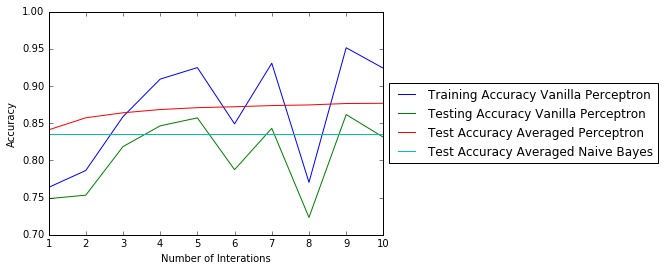

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
training_acc = [0.763701096087687, 0.7864229138331067, 0.8587486998959917, 0.9092727418193456, 0.9247139771181695, 0.8491079286342907, 0.9306344507560604, 0.7705416433314665, 0.9513961116889351, 0.9238739099127931]
test_acc = [0.7485798863909112, 0.7532602608208657, 0.8185054804384351, 0.8464677174173934, 0.8571485718857509, 0.7875430034402752, 0.8431474517961437, 0.7232978638291063, 0.8616289303144251, 0.8311064885190815]
avg_test_acc = [0.8410272821825746, 0.857268581486519, 0.8639891191295304, 0.8683494679574366, 0.8708696695735659, 0.8721097687815025, 0.8737098967917434, 0.8745499639971198, 0.8764701176094087, 0.8767501400112009]
NB_acc = [0.8352]*len(training_acc)

x = [i for i in range(1,len(training_acc)+1)]
plt.plot(x, training_acc, label = 'Training Accuracy Vanilla Perceptron')
plt.plot(x, test_acc, label = "Testing Accuracy Vanilla Perceptron")
plt.plot(x, avg_test_acc, label = 'Test Accuracy Averaged Perceptron')
plt.plot(x, NB_acc, label = 'Test Accuracy Averaged Naive Bayes' )
plt.xlabel('Number of Interations')
plt.ylabel('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.close()

## 5. Structured Perceptron with Viterbi (40 points) 

In this problem, you will implement a part-of-speech tagger for Twitter,
using the structured perceptron algorithm.
Your system will be not too far off from state of the art performance,
coding it all up yourself from scratch!

The dataset comes from http://www.ark.cs.cmu.edu/TweetNLP/
and is described in the papers listed there (Gimpel et al.~2011 and Owoputi et al.~2013).
The Gimpel article describes the tagset; the annotation guidelines on that webpage describe it futher.

Your structured perceptron will use your Viterbi implementation from 2.2 as a subroutine.
If that's buggy, this will cause many problems here---your perceptron will have really weird behavior.
(This happened to us when designing your assignment!)
If you have problems, try using the greedy decoding algorithm, which we provide in the starter code.
Make sure to note which decoding algorithm you're using in your writeup.

The starter code is `structperc.py` and it assumes the two data files `oct27.train`
and `oct27.dev` are in the same directory. (For simplicity we're just going to use this `dev` set as our test set.)


**Question 5.1** (2 points)

First let's do a little data analysis to establish the **most common tag** baseline accuracy.
Using a small script, load up the dev dataset (oct27.dev) using the function `structperc.read_tagging_file` (from `import structperc`). Calculate the following: What is the most common tag, and what would your accuracy be if you predicted it for all tags?




In [100]:
##Write your code here and show the output
import structperc_abhay
from collections import defaultdict
import operator

ret = structperc_abhay.read_tagging_file("oct27.dev")
tag_count_dict = defaultdict(int)
for tokens, tags in ret:
    for tag in tags:
        tag_count_dict[tag]+=1
print "Tag count Dictionary -->",tag_count_dict,"\n"
total_number_of_tags = sum(tag_count_dict.values())
print "Total Number of Tags",total_number_of_tags,"\n"
most_frequent_tag, most_frequent_tag_frequency = max(tag_count_dict.iteritems(), 
                                                     key=operator.itemgetter(1))
print "Most frequent Tag -->",most_frequent_tag,"With frequency -->", most_frequent_tag_frequency,"\n"

for tag in tag_count_dict:
    print "Accuracy for predicting tag", tag,"is ",(1.0*tag_count_dict[tag]/total_number_of_tags)

Tag count Dictionary --> defaultdict(<type 'int'>, {'!': 99, '#': 52, '$': 86, '&': 91, ',': 500, 'A': 239, '@': 243, 'E': 52, 'D': 312, 'G': 65, 'L': 65, 'O': 333, 'N': 660, 'P': 440, 'S': 5, 'R': 209, 'U': 91, 'T': 36, 'V': 751, 'X': 4, 'Z': 9, '^': 311, '~': 170}) 

Total Number of Tags 4823 

Most frequent Tag --> V With frequency --> 751 

Accuracy for predicting tag ! is  0.0205266431682
Accuracy for predicting tag # is  0.010781671159
Accuracy for predicting tag $ is  0.0178312253784
Accuracy for predicting tag & is  0.0188679245283
Accuracy for predicting tag , is  0.103669914991
Accuracy for predicting tag A is  0.0495542193655
Accuracy for predicting tag @ is  0.0503835786855
Accuracy for predicting tag E is  0.010781671159
Accuracy for predicting tag D is  0.0646900269542
Accuracy for predicting tag G is  0.0134770889488
Accuracy for predicting tag L is  0.0134770889488
Accuracy for predicting tag O is  0.0690441633838
Accuracy for predicting tag N is  0.136844287788
Accurac

The structured perceptron algorithm works very similarly as the classification version you did in the previous question, except the prediction function uses Viterbi as a subroutine, which has to call feature extraction functions for local emissions and transition factors. There also has to be a large overall feature extraction function for an entire structure at once. The following parts will build up these pieces. First, we will focus on inference, not learning.

**Question 5.2** (2 points)

We provide a barebones version of `local_emission_features`, which calculates the local features for a particular tag at a token position. You can run this function all by itself. Make up an example sentence, and call this function with it, giving it a particular index and candidate tag. Show the code for the function call you made and the function's return value, and explain what the features mean (just a sentence or two).

In [101]:
##Show the code for function call with output
my_sentence = "Natural language processing is awesome"
print structperc_abhay.local_emission_features(0, "N", my_sentence)

{'tag=N_curword=N': 1, 'tag=N_biasterm': 1}


*** Here the N_curword is the variable which gets activated for a noun tag. Value 1 means it got activated for the word "natural". Also the N_biasterm is the bias variable for identifying a noun. Here the bias term was also activated.***

**Question 5.3** (2 points)

Implement `features_for_seq()`, which extracts the full feature vector $f(x,y)$, where $x$is a sentence and $y$ is an entire tagging sequence for that sentence. This will add up the feature vectors from each local emissions features for every position, as well as transition features for every position (there are $N-1$ of them, of course).
Show the output on a very short example sentence and example proposed tagging, that's only 2 or 3 words long.

To define $f(x,y)$ a little more precisely: If $f^{(B)}(t,x,y)$ means the local emissions feature vector at position $t$ (i.e. the `local_emission_features` function), and $f^{(A)}(y_{t-1},y_{t}, y)$ is the transition feature function for positions $(t-1,t)$ (which just returns a feature vector where everything is zero, except a single element is 1), then the full sequence feature vector will be the vector-sum of all those feature vectors:
$$ f(x,y) = \sum_t^T f^{(B)}(t,x,y) + \sum_{t=2}^T f^{(A)}(y_{t-1},y_t) $$
You implemented $f^{(B)}$ above.  You probably don't need to bother implementing $f^{(A)}$ as a standalone function.  You will have to decide on a particular convention to encode the name of a transition feature.  For example, one way to do it is with string concatenation like this, `"trans_%s_%s" % (prevtag, curtag)`, where prevtag and curtag are strings.  Or you could use a python tuple of strings, which works since
tuples have the ability to be keys in a python dictionary.

In other words: the emissions and transition features will all be in the same vector, just as keys in the dictionary that represents the feature vector.  The transition features are going to be the count of how many times a particular transition (tag bigram) happened.  The emissions features are going to be the vector-sum of all the local emission features, as calculated from `local_emission_features`.

In [102]:
##Show the call to your function and output
from structperc_abhay import local_emission_features
my_sentence = "I am John"
sentence_tags = ["P","V","N"]
tokens = my_sentence.split(" ")
result = features_for_seq(tokens, sentence_tags)
print result

defaultdict(<type 'int'>, {'tag=N_curword=John': 1, 'tag=N_biasterm': 1, 'tag=V_biasterm': 1, ('V', 'N'): 1, ('P', 'V'): 1, 'tag=V_curword=am': 1, 'tag=P_curword=I': 1, 'tag=P_biasterm': 1})


**Question 5.4** (4 points)

Look at the starter code for `calc_factor_scores`, which calculates the A and B score functions that are going to be passed in to your Viterbi implementation from problem 2, in order to do a prediction. The only function it will need to call is `local_emission_features`. It should NOT call `features_for_seq`.  Why not?

***Answer: local_emission_features	is	important here because, feature_for_seq	function thinks	that	the	given	tokens	in	the	first	argument	are	labelled	by	the	labelseq.	We want to estimate total features set and for that we need to call local_emission_features.***

**Question 5.5** (6 points)

Implement `calc_factor_scores`. Make up a simple example (2 or 3 words long), with a simple model with at least some 
nonzero features (you might want to use a `defaultdict(float)`, so you don't have to fill up a dict with dummy values 
for all possible transitions), and show your call to this function and the output.

In [105]:
import structperc_abhay

example_sentence = "I am John"
weights=defaultdict(int,{('V','N'): 6, "tag=V_curword=Test":20})
tokens = example_sentence.split()
print structperc_abhay.calc_factor_scores(tokens, weights)

({('D', '^'): 0, ('M', '@'): 0, ('^', '&'): 0, ('N', '#'): 0, ('G', 'G'): 0, ('X', 'D'): 0, ('#', 'U'): 0, ('E', 'M'): 0, (',', 'U'): 0, ('S', '!'): 0, ('@', 'X'): 0, ('A', 'N'): 0, ('T', '@'): 0, ('M', '&'): 0, ('A', 'Y'): 0, ('R', '#'): 0, ('O', '!'): 0, ('Y', 'V'): 0, ('O', 'O'): 0, ('V', 'X'): 0, ('G', 'E'): 0, ('E', 'D'): 0, ('&', '&'): 0, ('!', '&'): 0, ('R', '$'): 0, ('O', 'N'): 0, ('X', 'M'): 0, ('Z', '$'): 0, ('Z', '^'): 0, ('Y', 'E'): 0, ('G', 'D'): 0, ('R', '^'): 0, ('T', 'N'): 0, ('#', '@'): 0, ('Y', 'X'): 0, ('O', 'M'): 0, ('V', ','): 0, ('S', 'S'): 0, ('N', 'T'): 0, ('X', '^'): 0, ('R', '&'): 0, ('$', 'S'): 0, ('N', '^'): 0, ('O', 'L'): 0, ('Z', 'P'): 0, ('@', 'U'): 0, ('L', '#'): 0, ('#', '^'): 0, ('$', '&'): 0, ('D', 'S'): 0, ('D', 'X'): 0, ('V', 'T'): 0, ('P', 'V'): 0, ('P', 'O'): 0, ('E', '!'): 0, ('P', 'D'): 0, ('D', '$'): 0, ('S', '$'): 0, ('N', 'O'): 0, ('A', 'M'): 0, ('L', '!'): 0, ('U', 'V'): 0, (',', 'L'): 0, ('Z', 'S'): 0, ('S', 'O'): 0, ('X', 'G'): 0, ('&', 'X

**Question 5.6** (4 points)

Implement `predict_seq()`, which predicts the tags for an input sentence, given a model. It will have to calculate the factor scores, then call Viterbi as a subroutine, then return the best sequence prediction. If your Viterbi implementation does not seem to be working, use the implementation of the greedy decoding
algorithm that we provide (it uses the same inputs as `vit_starter.viterbi()`).


In [104]:
## Copy and paste predict_seq() function here
def predict_seq(tokens, weights):
    """
    IMPLEMENT ME!
    takes tokens and weights, calls viterbi and returns the most likely
    sequence of tags
    """
    # once you have Ascores and Bscores, could decode with
    # predlabels = greedy_decode(Ascores, Bscores, OUTPUT_VOCAB)
    #pass
    (Ascores, Bscores) = calc_factor_scores(tokens, weights)
    return viterbi(Ascores, Bscores, OUTPUT_VOCAB)

OK, you're done with the inference part.  Time to put it all together into the parameter learning algorithm and see it go. 

**Question 5.7** (14 points)

Implement `train()`, which does structured perceptron training with the averaged perceptron algorithm. You should train on oct27.train, and evaluate on oct27.dev. You will want to first get it working without averaging, then add averaging to it. Run it for 10 iterations, and print the devset accuracy at each training iteration. Note that we provide evaluation code, which assumes `predict_seq()` and everything it depends on is working properly.

For us, here's the performance we get at the first and last iterations, using the features in the starter code (just the bias term and the current word feature, without case normalization).

`
Training iteration 0
DEV RAW EVAL: 2556/4823 = 0.5300 accuracy
DEV AVG EVAL: 2986/4823 = 0.6191 accuracy
...
Training iteration 9
DEV RAW EVAL: 3232/4823 = 0.6701 accuracy
DEV AVG EVAL: 3341/4823 = 0.6927 accuracy
Learned weights for 24361 features from 1000 examples
`



**Show your accuracy values for 10 iterations here**

<img src='5.7.png'>

**Question 5.8** (6 points)

Print out a report of the accuracy rate for each tag in the development set. We provided a function to do this `fancy_eval`. Look at the two sentences in the dev data, and in your writeup show and compare the gold-standard tags versus your model's predictions for them.  Consult the tagset description to understand what's going on.
What types of things does your tagger get right and wrong?

To look at the examples, you may find it convenient to use `show_predictions` (or write up the equivalent manually).  For example, after 1 iteration of training, we get this output from the first sentence in the devset.
(After investigating TV shows that were popular in 2011 when the tweet was authored, we actually think some of the gold-standard tags in this example might be wrong.)


              word                 gold pred
              ----                 ---- ----
              @ciaranyree          @    @   
              it                   O    O   
              was                  V    V   
              on                   P    P   
              football             N    ^     *** Error
              wives                N    N   
              ,                    ,    ,   
              one                  $    $   
              of                   P    P   
              the                  D    D   
              players              N    N   
              and                  &    &   
              his                  D    D   
              wife                 N    N   
              own                  V    V   
              smash                ^    D     *** Error
              burger               ^    N     *** Error


To do this part, you may find it useful to save your model's weights with pickle.dumps (or json.dumps) and have a short analysis script that loads the model and devdata to do the reports.  If you have to re-train each time you tweak your analysis code, it can be annoying.

*** Accuracies for all tags ***
<img src='5.8.0.png'>

*** Sample Predictions ***

*** Here "Tour","Ted" were predicted correctly as Nouns, but the gold tag was wrong **
<img src='5.8.png'>


**Question 5.9** (OPTIONAL: 4 Extra Credit points)

Improve the features of your tagger to improve accuracy on the development set. This will only require changes to `local_emission_features`. Implement at least 4 new types of features. Report your tagger's accuracy with these improvements. Please make a table that reports accuracy from adding different features. The first row should be the basic system, and the last row should be the fanciest system. Rows in between should report different combinations of features. One simple way to do this is, if you have 4 different feature types, to run 4 experiments where in each one, you add only one feature type to the basic system. For example:

<img src="3.png"> 

Hint: if you make features about the first character of a word, that helps a lot for the # (hashtag) and @ (at-mention) tags.  The URL tag is easy to get too with a similar form of character affix analysis. Character affixes help lots of other tags too. Also, if you have a feature that looks at the word at position $t$, you can make new versions of it that look to the left or right of the $t^{th}$ position in question: for example, 'word_to_left=the'.
